<a href="https://colab.research.google.com/github/J-Yuna/myfirst/blob/main/SVM.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

사이킷런에 다양한 데이터셋 - 유방암 데이터를 사용하여 분류모델 생성

https://blog.naver.com/aattspa/222943741707 

https://blog.naver.com/banker_sim/222893132584 
https://blog.naver.com/banker_sim/222947066596 


In [1]:
!pip install lightgbm  #라이브러리 설치치
!pip install scikit-learn --user --upgrade  #라이브러리 업그레이드

#라이브러리
import pandas as pd
import numpy as np

#시각화 라이브러리
import matplotlib.pyplot as plt
import seaborn as sns

#통계 라이브러리
from sklearn import metrics
from sklearn.model_selection import train_test_split

#SVM
from sklearn import svm

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [21]:
from sklearn.datasets import load_breast_cancer  #유방암 데이터 불러오기

cancer = load_breast_cancer()
cancer = pd.DataFrame(np.c_[cancer["data"], cancer["target"]],
                      columns = np.append(cancer["feature_names"],["target"]))
cancer.head()
cancer.tail()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,target
564,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,0.05623,...,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115,0.0
565,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,0.05533,...,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637,0.0
566,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,0.05648,...,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820,0.0
567,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,0.2397,0.07016,...,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400,0.0
568,7.76,24.54,47.92,181.0,0.05263,0.04362,0.00000,0.00000,0.1587,0.05884,...,30.37,59.16,268.6,0.08996,0.06444,0.0000,0.0000,0.2871,0.07039,1.0


In [12]:
#데이터 분리
X = cancer.drop("target", axis=1)
y = cancer["target"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 123, stratify = y)
X.head()
y.head()

0    0.0
1    0.0
2    0.0
3    0.0
4    0.0
Name: target, dtype: float64

In [16]:
#함수 정의
def clf_evaluate(x,y):
  result = pd.DataFrame(dict(accuracy_score = [metrics.accuracy_score(y_true=x, y_pred = y)],
                             precision_score=[metrics.precision_score(y_true= x, y_pred=y)],
                             recall_score = [metrics.recall_score(y_true = x, y_pred = y)],
                             f1_score = [metrics.f1_score(y_true = x, y_pred = y)],
                             roc_auc_score = [metrics.roc_auc_score(y_true = x, y_score=y)]))
  return result

def confusion_matrix(x,y):
  return metrics.confusion_matrix(y_true = x, y_pred = y)

In [35]:
#모델 생성
model_svm = svm.SVC(kernel='linear',
                    probability = True)
model_svm.fit(X_train, y_train)
pred_svm = model_svm.predict(X_test)
pred_proba_svm = model_svm.predict_proba(X_test)   #각 클래스에 대한 확률률

#모델평가
from sklearn.metrics import confusion_matrix

clf_evaluate(y_test, pred_svm)
confusion_matrix(y_test, pred_svm)
'''
#변수중요도
result_svm = pd.DataFrame(dict(feature = model_svm.feature_names_in_,
                               feature_importance = model_svm.coef_[0]))
result_svm.sort_values(by = "feature_importance", ascending=False).head(0)'''



'\n#변수중요도\nresult_svm = pd.DataFrame(dict(feature = model_svm.feature_names_in_,\n                               feature_importance = model_svm.coef_[0]))\nresult_svm.sort_values(by = "feature_importance", ascending=False).head(0)'

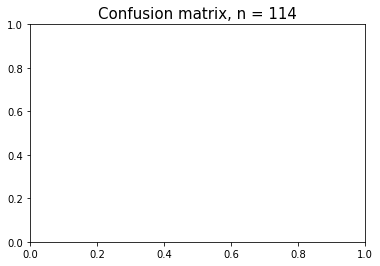

[[41  1]
 [ 1 71]]


In [44]:
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt

fig, ax = plt.subplots()
pcm = confusion_matrix(y_test, pred_svm)
                            #cmap=plt.cm.Blues,
                            #ax=ax);
plt.title(f'Confusion matrix, n = {len(pred_svm)}', fontsize=15)
plt.show()
print(pcm)